In [55]:
import pandas as pd
import numpy as np

\
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [56]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [58]:
df_obj = df.select_dtypes(include = ['object']).copy()
df_obj.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [59]:
df_obj[df_obj.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


In [60]:
df_obj["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [61]:
df_obj = df_obj.fillna({"num_doors": "four"})

In [62]:
df_obj["num_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [63]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [64]:
df_obj = df_obj.replace(cleanup_nums)
df_obj.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi



# Label Encoding

In [65]:
df_obj["body_style"] = df_obj["body_style"].astype('category')
df_obj.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors             int64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [66]:
df_obj["body_style_cat"] = df_obj["body_style"].cat.codes
df_obj.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3


Advantage:
    he nice aspect of this approach is that you get the benefits of pandas categories 
    (compact data size, ability to order, plotting support) 
    but can easily be converted to numeric values for further analysis.
    
Disadvantage:
     the numeric values can be “misinterpreted” by the algorithms.

# One Hot Encoding

 This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [67]:
pd.get_dummies(df_obj, columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0


# Binary Encoding

In [38]:
combination of label encoding and one hot encoding to create a binary column 

SyntaxError: invalid syntax (2215645459.py, line 1)

In [68]:
df_obj["engine_type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [69]:
df_obj["OHC_Code"] = np.where(df_obj["engine_type"].str.contains("ohc"), 1, 0)

In [70]:
df_obj[["make", "engine_type", "OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


This approach can be really useful if there is an option to consolidate to a simple Y/N value in a column

# OrdinalEncoder - Lable encoder

In [71]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_obj["make_code"] = ord_enc.fit_transform(df_obj[["make"]])
df_obj[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0.0
1,alfa-romero,0.0
2,alfa-romero,0.0
3,audi,1.0
4,audi,1.0
5,audi,1.0
6,audi,1.0
7,audi,1.0
8,audi,1.0
9,audi,1.0


In [72]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["body_style"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

NameError: name 'obj_df' is not defined

# Frequency Encoding

In [73]:
df_obj['fuel_system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,body_style_cat,OHC_Code,make_code,fuel_system_freq_encode
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,0,1,0.0,0.458537
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,0,1,0.0,0.458537
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,2,1,0.0,0.458537
3,audi,gas,std,4,sedan,fwd,front,ohc,4,3,1,1.0,0.458537
4,audi,gas,std,4,sedan,4wd,front,ohc,5,3,1,1.0,0.458537
5,audi,gas,std,2,sedan,fwd,front,ohc,5,3,1,1.0,0.458537
6,audi,gas,std,4,sedan,fwd,front,ohc,5,3,1,1.0,0.458537
7,audi,gas,std,4,wagon,fwd,front,ohc,5,4,1,1.0,0.458537
8,audi,gas,turbo,4,sedan,fwd,front,ohc,5,3,1,1.0,0.458537
9,audi,gas,turbo,2,hatchback,4wd,front,ohc,5,2,1,1.0,0.458537


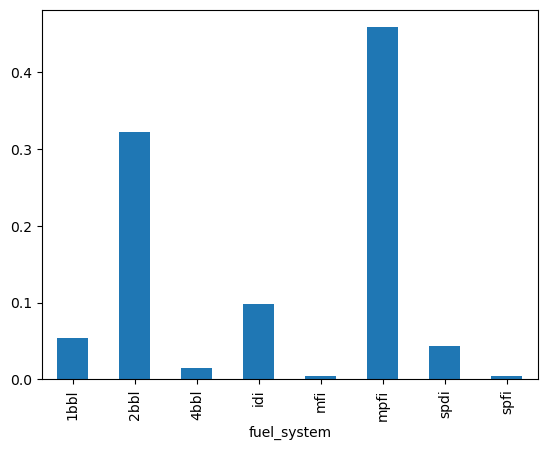

In [74]:
# grouping by frequency
fq = df_obj.groupby('fuel_system').size()/len(df_obj)
# mapping values to dataframe
df_obj.loc[:, "{}_freq_encode".format('fuel_system')] = df_obj['fuel_system'].map(fq)
# drop original column.
df_obj = df_obj.drop(['fuel_system'], axis=1)
fq.plot.bar(stacked=True)
df_obj.head(10)

In [45]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   make                     205 non-null    object  
 1   fuel_type                205 non-null    object  
 2   aspiration               205 non-null    object  
 3   num_doors                205 non-null    int64   
 4   body_style               205 non-null    category
 5   drive_wheels             205 non-null    object  
 6   engine_location          205 non-null    object  
 7   engine_type              205 non-null    object  
 8   num_cylinders            205 non-null    int64   
 9   body_style_cat           205 non-null    int8    
 10  OHC_Code                 205 non-null    int32   
 11  make_code                205 non-null    float64 
 12  fuel_system_freq_encode  205 non-null    float64 
dtypes: category(1), float64(2), int32(1), int64(2), int8(1), object(6

# Mean encoding

In [75]:
# importing TargetEncoder
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
values = Targetenc.fit_transform(X = df_obj.body_style, y = df_obj.OHC_Code)
# concatenating values with dataframe
df_obj = pd.concat([df_obj, values], axis = 1)


C:\Users\Rawan\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Rawan\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [76]:
df_obj

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,body_style_cat,OHC_Code,make_code,fuel_system_freq_encode,body_style
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,0,1,0.0,0.458537,0.999478
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,0,1,0.0,0.458537,0.999478
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,2,1,0.0,0.458537,0.928571
3,audi,gas,std,4,sedan,fwd,front,ohc,4,3,1,1.0,0.458537,0.927083
4,audi,gas,std,4,sedan,4wd,front,ohc,5,3,1,1.0,0.458537,0.927083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,ohc,4,3,1,21.0,0.458537,0.927083
201,volvo,gas,turbo,4,sedan,rwd,front,ohc,4,3,1,21.0,0.458537,0.927083
202,volvo,gas,std,4,sedan,rwd,front,ohcv,6,3,1,21.0,0.458537,0.927083
203,volvo,diesel,turbo,4,sedan,rwd,front,ohc,6,3,1,21.0,0.097561,0.927083
